In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [4]:
df = pd.read_csv(r'.\Salary_Data.csv')

## Exploring the dataset

In [5]:
df.shape

(6704, 6)

In [6]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [8]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [9]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6702.0,33.620859,7.614633,21.0,28.0,32.0,38.0,62.0
Years of Experience,6701.0,8.094687,6.059003,0.0,3.0,7.0,12.0,34.0
Salary,6699.0,115326.964771,52786.183911,350.0,70000.0,115000.0,160000.0,250000.0


## Cleaning the dataset

In [11]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Because the amount of null values is so small they can be filled using (in this case) a median value.

In [12]:
df.fillna(df.median(), inplace=True)

In [13]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

As we can see only the numeric columns can be filled in this way. The rest of the rows with null values will be dropped.

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(6701, 6)

Now as we saw the unique values for the column 'Education Level' are duplicated, it needs to be fixed.

In [16]:
mapping_dict = {'Bachelor\'s':'Bachelor\'s Degree',
            'Master\'s':'Master\'s Degree',
            'phD':'PhD'}

df['Education Level'] = df['Education Level'].replace(mapping_dict)


In [17]:
df['Education Level']

0       Bachelor's Degree
1         Master's Degree
2                     PhD
3       Bachelor's Degree
4         Master's Degree
              ...        
6699                  PhD
6700          High School
6701    Bachelor's Degree
6702      Master's Degree
6703          High School
Name: Education Level, Length: 6701, dtype: object

In [18]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


## EDA

### Summary statistics of numerical data

In [170]:
def graph_summary(column, df=df):
    series = df[f'{column}']
    summary_stats = series.describe()

    # Quartiles + min and max
    quartiles = summary_stats[3:]

    # Create a bar plot for quartiles
    sns.barplot(x=quartiles.index, y=quartiles.values)

    # Calculate mean and standard deviation
    mean = summary_stats['mean']
    std = summary_stats['std']

    # Create a line plot for mean and standard deviation
    plt.axhline(mean, color='black', linestyle='--', label='Mean')
    plt.axhline(mean + std, color='blue', linestyle='--', label='Mean + Std')
    plt.axhline(mean - std, color='red', linestyle='--', label='Mean - Std')

    # Set the axis labels and title
    plt.xlabel('Percentile / Summary')
    plt.ylabel('Value')
    plt.title(f'{column} Summary Statistics')

    # Add legend
    plt.legend()

    # Display the graph
    plt.show()

In [139]:
# Age data summary

age_summary = df['Age'].describe().round(2)
age_summary

count    6701.00
mean       33.62
std         7.61
min        21.00
25%        28.00
50%        32.00
75%        38.00
max        62.00
Name: Age, dtype: float64

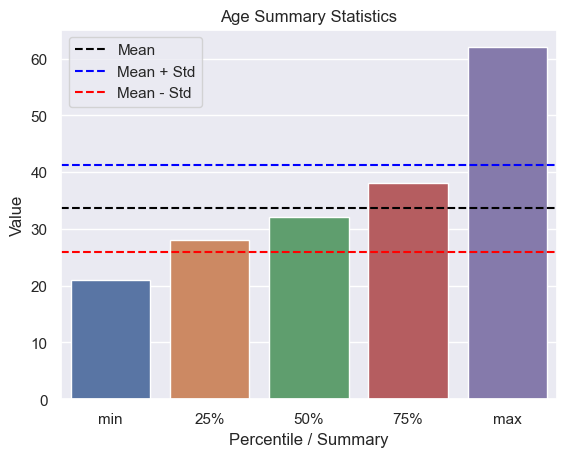

In [171]:
graph_summary('Age')

In [20]:
# Years of experience data summary

df['Years of Experience'].describe().round(2)

count    6701.00
mean        8.09
std         6.06
min         0.00
25%         3.00
50%         7.00
75%        12.00
max        34.00
Name: Years of Experience, dtype: float64

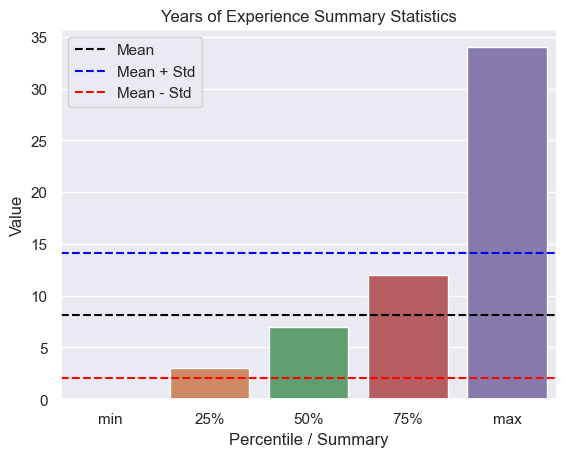

In [172]:
graph_summary('Years of Experience')

In [21]:
# Salary data summary

df['Salary'].describe().round(2)

count      6701.00
mean     115329.11
std       52777.97
min         350.00
25%       70000.00
50%      115000.00
75%      160000.00
max      250000.00
Name: Salary, dtype: float64

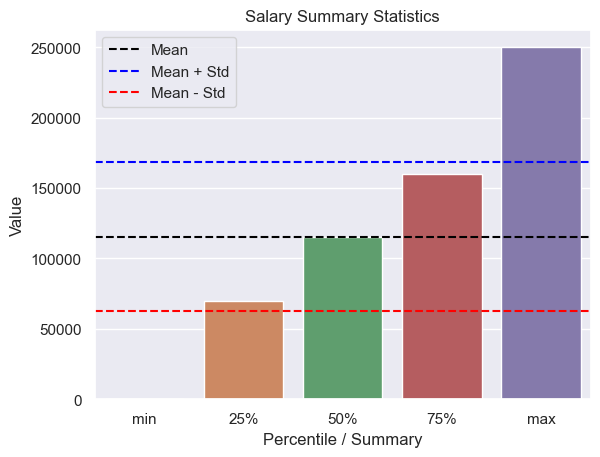

In [173]:
graph_summary('Salary')

### Gender analysis

In [22]:
# Dataset gender value count

gender_value_count = df['Gender'].value_counts()
gender_value_count

Male      3673
Female    3014
Other       14
Name: Gender, dtype: int64

In [23]:
# Dataset gender percentage distribution

gender_distribution = (df['Gender'].value_counts(normalize=True) * 100).round(2)
gender_distribution

Male      54.81
Female    44.98
Other      0.21
Name: Gender, dtype: float64

### Education level analysis

In [24]:
# Education Level value count

edu_value_count = df['Education Level'].value_counts()
edu_value_count

Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64

In [25]:
# Education Level distribution

edu_distribution = (df['Education Level'].value_counts(normalize=True) * 100).round(2)
edu_distribution

Bachelor's Degree    45.11
Master's Degree      27.77
PhD                  20.43
High School           6.69
Name: Education Level, dtype: float64

### Job Title analysis

Let's see how many unique job titles are in the dataset

In [48]:
job_titles_unique = len(df['Job Title'].unique())
print(f'Unique job titles: {job_titles_unique}')

Unique job titles: 192


Now which are the top 10 job titles by count

In [128]:
# Top n job titles by count

top_n = 10
top_job_titles = df['Job Title'].value_counts().nlargest(top_n)
top_job_titles

Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          309
Marketing Manager            255
Back end Developer           244
Senior Software Engineer     244
Name: Job Title, dtype: int64

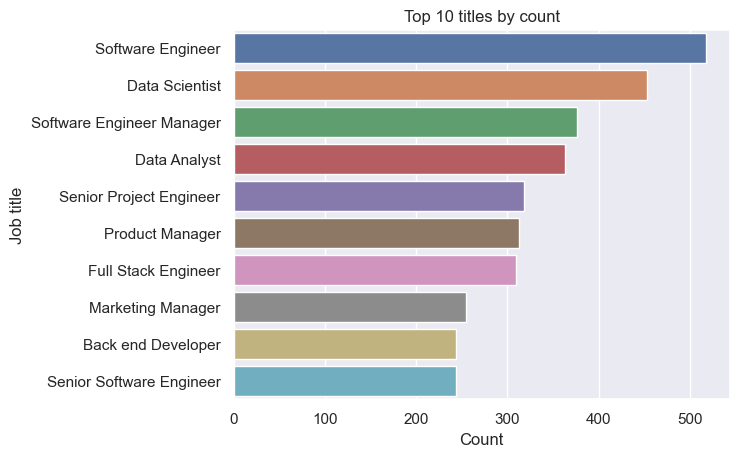

In [135]:
sns.set(style='darkgrid')

sns.barplot(x=top_job_titles.values, y=top_job_titles.index)

plt.xlabel('Count')
plt.ylabel('Job title')
plt.title('Top 10 titles by count')

plt.show()

Next let's identify the number of times that the word Junior or Senior is included in the Job title.

In [27]:
key_word_counter = {'Junior':0,
                    'Senior':0}

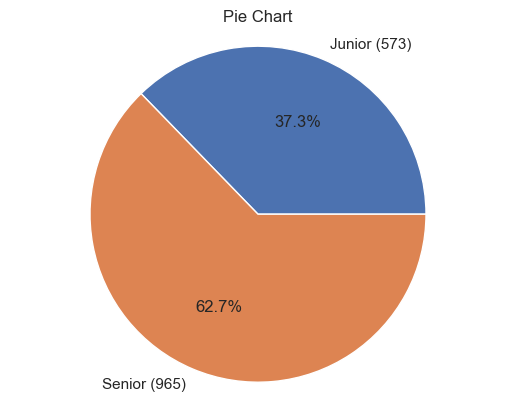

In [106]:

for key in key_word_counter:
    key_word_counter[key] = df['Job Title'].str.contains(key).sum()

jr_sr_count = pd.DataFrame.from_dict(key_word_counter, orient='index', columns=['Counts'])

values = jr_sr_count['Counts'].values
labels = jr_sr_count['Counts'].index
labels = [f"{label} ({count})" for label, count in zip(labels, values)]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart')

plt.show()



Let's do a quick wordcloud graph to visualize the frequency of appearance

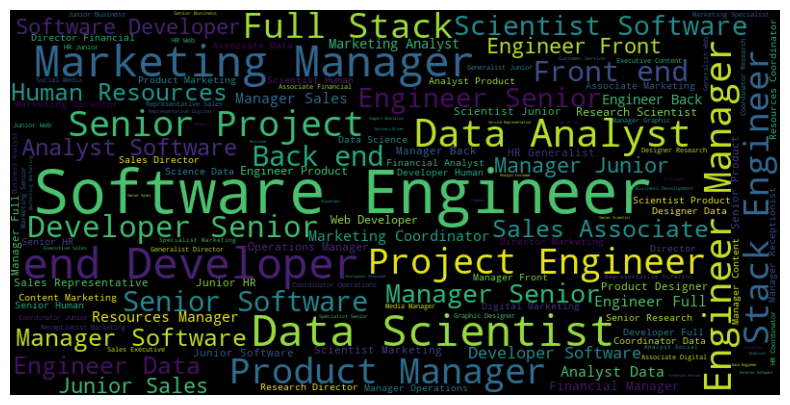

In [29]:
text_data = df['Job Title'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now we can take a quick insight into the most common job titles in the data set.

### Correlation analytics

Let's encode the non-numeric columns to do a more in deep correlation analysis

In [53]:
df_encoded = pd.get_dummies(df, columns=['Gender','Education Level','Job Title'], prefix=['gender_','edul_','jobtitle_'])

In [54]:
df_encoded.shape

(6701, 202)

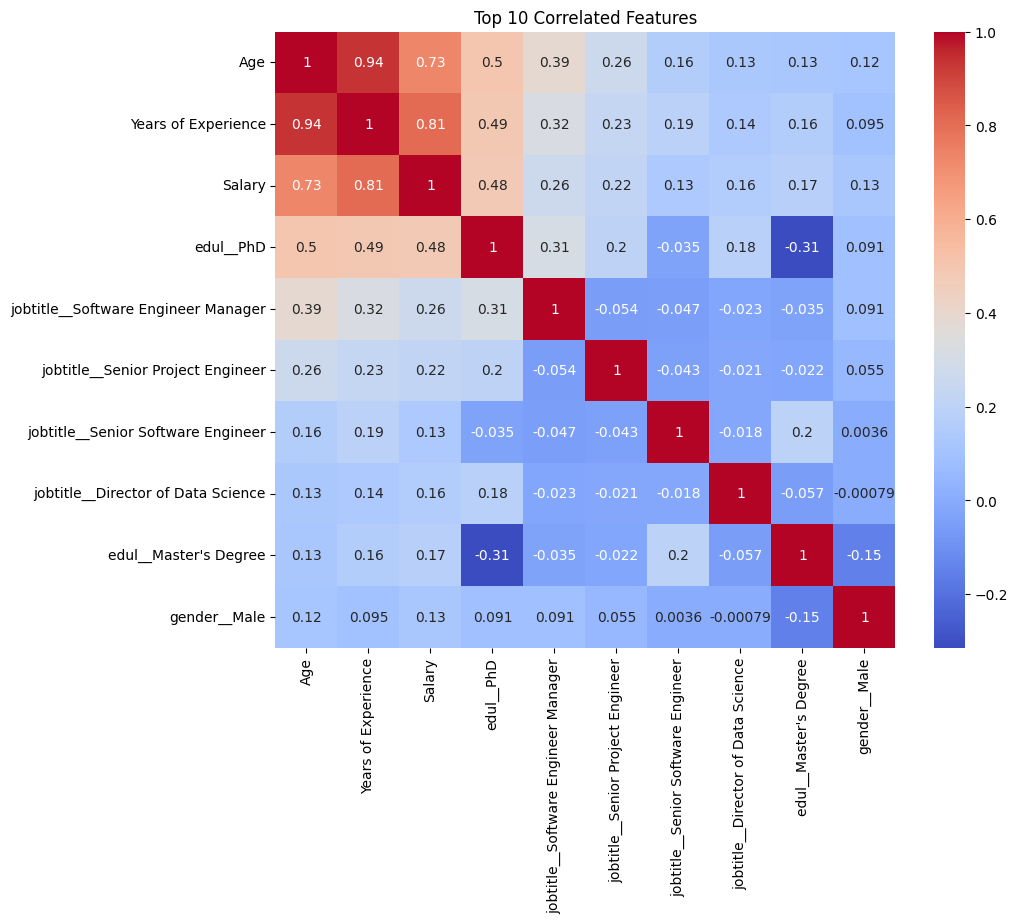

In [71]:
corr_matrix = df_encoded.corr()
num_top_features = 10

# Extract the top correlated features
top_correlations = corr_matrix.nlargest(num_top_features, 'Age')

# Create a subset correlation matrix for the top correlated features
subset_corr_matrix = df_encoded[top_correlations.index].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Top {num_top_features} Correlated Features')
plt.show()


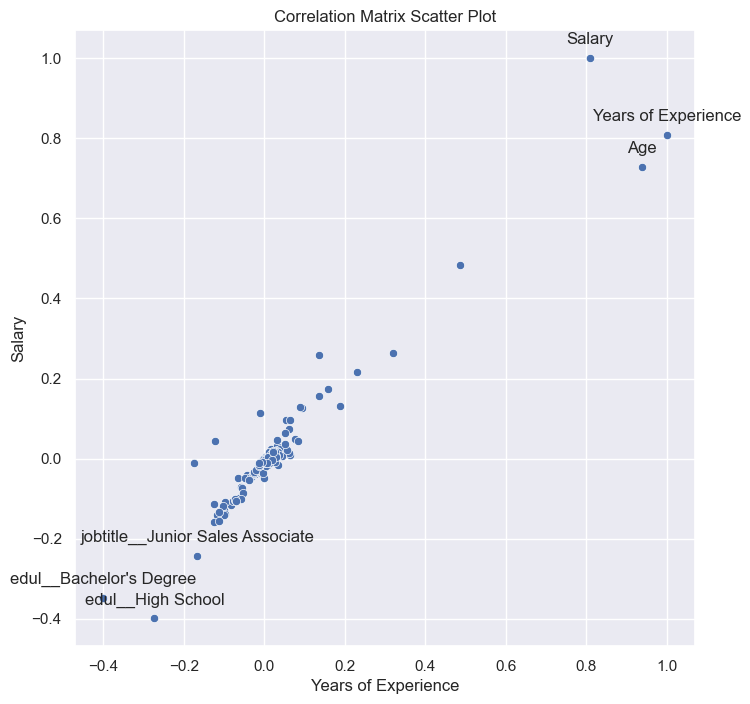

In [88]:
# Scatter plot of the correlation matrix
sns.set(style="darkgrid")

plt.figure(figsize=(8, 8))
sns.scatterplot(data=corr_matrix, x='Years of Experience', y='Salary')

outliers = corr_matrix[(corr_matrix['Years of Experience'] > 0.6) | (corr_matrix['Years of Experience'] < -0.2) |
              (corr_matrix['Salary'] > 0.6) | (corr_matrix['Salary'] < -0.2)]

for index, row in outliers.iterrows():
    plt.annotate(index, (row['Years of Experience'], row['Salary']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Correlation Matrix Scatter Plot')
plt.show()

In the scatterplot graph we use Years of Experience and Salary as our x and y axis respectibly, we can suplement the lack of deeper analytics of the clustering using the previous heatmap to see the correlations of the top features in detail.

As we can see from the correlation analysis there is a big clustering of non-correlated or lowly correlated features, with a few highly correlated features acting as outliers.
In this last group we can identify 2 groups, postively and negatively correlated.

Positively correlated: Salary, Years of Experience, Age
Negatively correlated: jobtitle_Junior Sales Associate, edul_Bachelor's Degree, edul_High School